<a href="https://colab.research.google.com/github/TonyStone23/Summer_Research_2025/blob/main/weekTwo/Boston%20Housing/bostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import libraries, set random state
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score as r2

randomState = 42

In [44]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [45]:
data = data.rename(columns={'MEDV':'TARGET'})

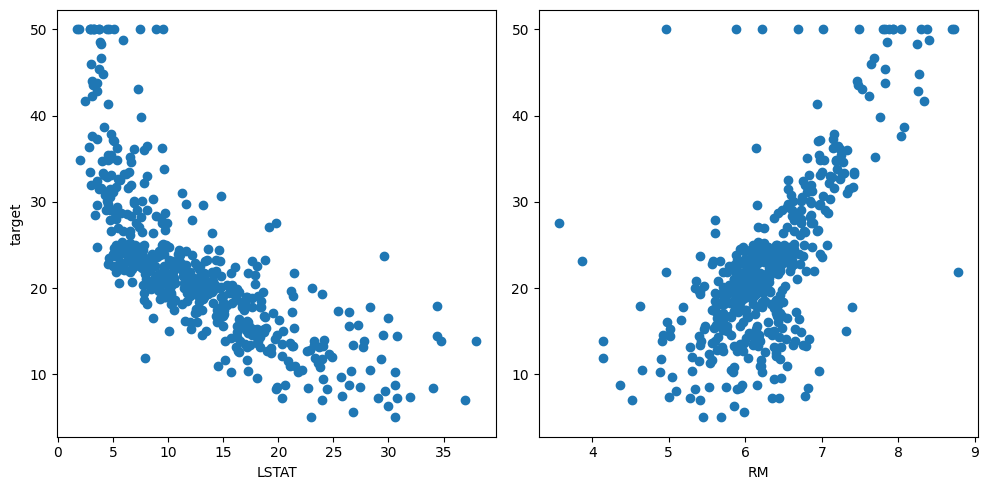

In [46]:
# Determine the independent and dependent variables
plt.figure(figsize = (10, 5))

features = data[['LSTAT', 'RM']]
target = data["TARGET"]

plt.subplot(1, 2, 1)
plt.scatter(data['LSTAT'], target)
plt.xlabel('LSTAT')
plt.ylabel("target")

plt.subplot(1, 2, 2)
plt.scatter(data['RM'], target)
plt.xlabel('RM')

plt.tight_layout()
plt.show()

In [47]:
# Create an instance of the model
LR = LinearRegression()

# Split into training and testing data
X_train, X_test, y_train, y_test = tts(features, target, test_size = .2, random_state = randomState)

# Initialize and fit the model
LR = LinearRegression()
LR.fit(X_train, y_train)

bias = LR.intercept_
weight = LR.coef_

# Predictions for training and testing case
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

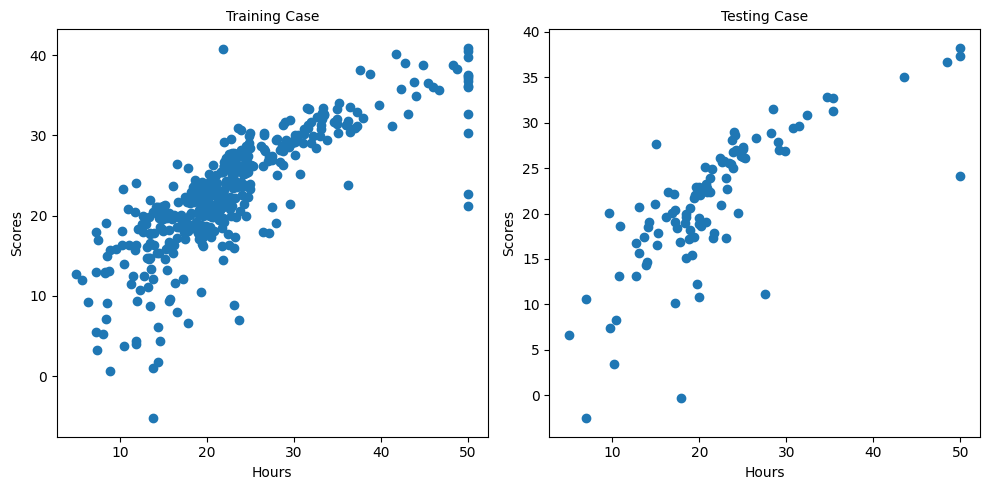

In [48]:
# Visualise the predictions
plt.figure(figsize = (10, 5))

# Subplot one
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.plot()
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Training Case', fontsize = 10)

# Subplot two
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Testing Case', fontsize = 10)

plt.tight_layout()
plt.show()

In [49]:
# Model Evaluation

mse_train = MSE(y_train, y_pred_train)
mae_train = MAE(y_train, y_pred_train)
r2_train = r2(y_train, y_pred_train)

mse_test = MSE(y_test, y_pred_test)
mae_test = MAE(y_test, y_pred_test)
r2_test = r2(y_test, y_pred_test)

performance = pd.DataFrame({
    'Metric':['MSE', 'MAE', 'R2', 'MSE', 'MAE', 'R2'],
    'DataType':['train', 'test', 'train', 'train', 'test', 'test'],
    'Values':[mse_train, mae_train, r2_train, mse_test, mae_test, r2_test]
})

performance

,Metric,DataType,Values
0,MSE,train,30.391855
1,MAE,test,3.940490
2,R2,train,0.650159
3,MSE,train,31.243291
4,MAE,test,3.898760
5,R2,test,0.573958


In [50]:
# Predict for new houses
new_houses_data = {
    'LSTAT':[5.0, 4.0, 15.0],
    'RM':[7, 6, 8]
}

new_houses_df = pd.DataFrame(new_houses_data)
new_houses_df

,LSTAT,RM
0,5.0,7
1,4.0,6
2,15.0,8


In [51]:
new_houses_pred = LR.predict(new_houses_df)
new_houses_pred

array([31.25202152, 26.41942131, 30.39213466])

In [53]:
new_houses_df['Predicted Prices'] = new_houses_pred
new_houses_df

,LSTAT,RM,Predicted Prices
0,5.0,7,31.252022
1,4.0,6,26.419421
2,15.0,8,30.392135


In [55]:
# An additional set of new houses
new_houses_data = {
    'LSTAT':[5.0, 4.0, 10.0, 11.0, 15.0, 13.0, 9.0],
    'RM':[8, 6, 5, 7, 8, 5, 6]
}
new_houses_df = pd.DataFrame(new_houses_data)
new_houses_pred = LR.predict(new_houses_df)
new_houses_df['Predicted Prices'] = new_houses_pred
new_houses_df

,LSTAT,RM,Predicted Prices
0,5.0,8,36.717120
1,4.0,6,26.419421
2,10.0,5,17.159331
3,11.0,7,27.457030
4,15.0,8,30.392135
5,13.0,5,15.261835
6,9.0,6,23.256928
